In [15]:
import pandas as pd # provides fast data analysis structures and tools
import numpy as np # faster way of working with arrays


import math
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns # to visualize data
import matplotlib.pyplot as plt
import ipywidgets as widgets


import seaborn as sns # to visualize data
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [4]:
# read and save .csv file in a 2d structure df
df = pd.read_csv('test_scores.csv')
# identifies the two columns to be worked on
df_binary = df[['pretest', 'posttest']]
# renames columns
df_binary.columns = ['Pre-test Scores', 'Post-test Scores']
print('Data Representation')
df_binary

Data Representation


,Pre-test Scores,Post-test Scores
0,62.0,72.0
1,66.0,79.0
2,64.0,76.0
3,61.0,77.0
4,64.0,76.0
...,...,...
2128,39.0,55.0
2129,38.0,46.0
2130,45.0,51.0
2131,46.0,53.0


Data Visualization 1


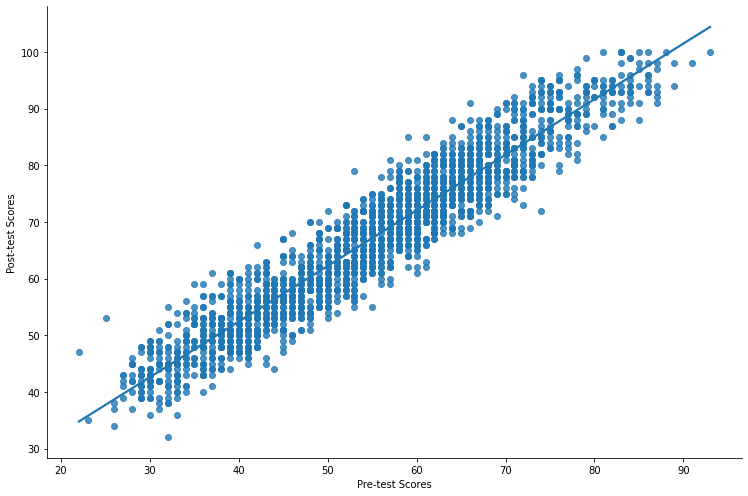

In [5]:
# visualize the data in a linear regression fit graph
sns.lmplot(x = 'Pre-test Scores', y = 'Post-test Scores', data = df_binary, ci = None, height=7, aspect=1.5)
ax = plt.gca()
ax.set(xlabel = 'Pre-test Scores', ylabel = 'Post-test Scores')
print('Data Visualization 1')
plt.show()


Data Visualization 2


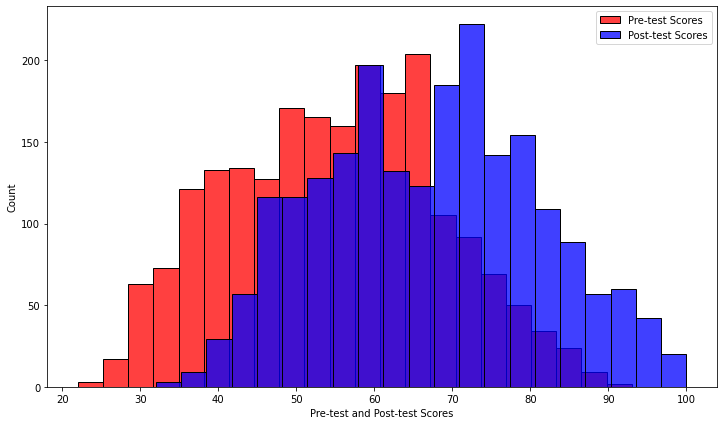

In [6]:
plt.figure(figsize = (12, 7))
sns.histplot(data = df_binary, x = 'Pre-test Scores', color = 'r', label = 'Pre-test Scores')
sns.histplot(data = df_binary, x = 'Post-test Scores', color = 'b', label = 'Post-test Scores')
ax = plt.gca()
ax.set(xlabel = 'Pre-test and Post-test Scores', ylabel = 'Count')
plt.legend() 
print('Data Visualization 2')
plt.show()

Data Visualization 3


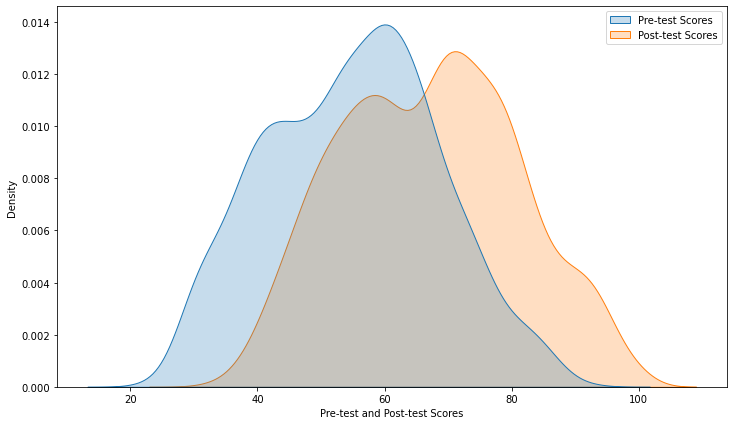

In [7]:
plt.figure(figsize=(12,7))
sns.kdeplot(data = df_binary[['Pre-test Scores', 'Post-test Scores']], shade = True)
ax = plt.gca()
ax.set(xlabel = 'Pre-test and Post-test Scores')
print('Data Visualization 3')
plt.show()

Data Visualization 3


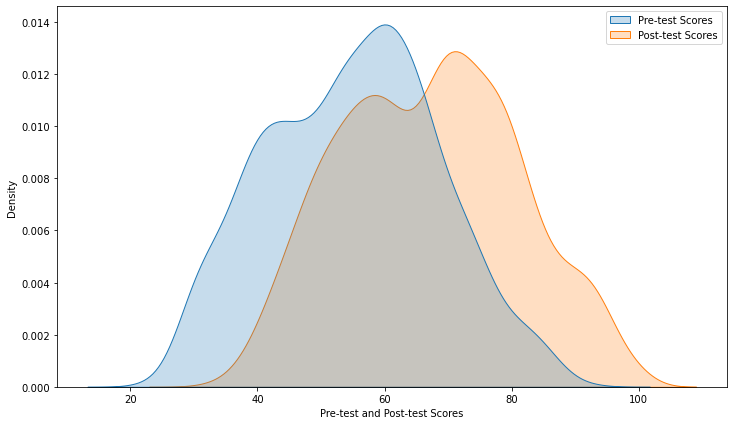

In [8]:
plt.figure(figsize=(12,7))
sns.kdeplot(data = df_binary[['Pre-test Scores', 'Post-test Scores']], shade = True)
ax = plt.gca()
ax.set(xlabel = 'Pre-test and Post-test Scores')
print('Data Visualization 3')
plt.show()

In [9]:
# reshapes and separates the columns into x and y arrays
x = np.array(df_binary['Pre-test Scores']).reshape(-1, 1)
y = np.array(df_binary['Post-test Scores']).reshape(-1, 1)

# Train Test Split creates a model using only the training data given, in this case pretest and posttest scores
# and is then evaluated by the test data
X_train, X_test, y_train, y_test = train_test_split(x, y)
regr = LinearRegression()
# creates the best fit line for the model to determine our predictions and how accurate they are
regr.fit(X_train, y_train)

y_predict = regr.predict(X_test)

Projection Visualization 1


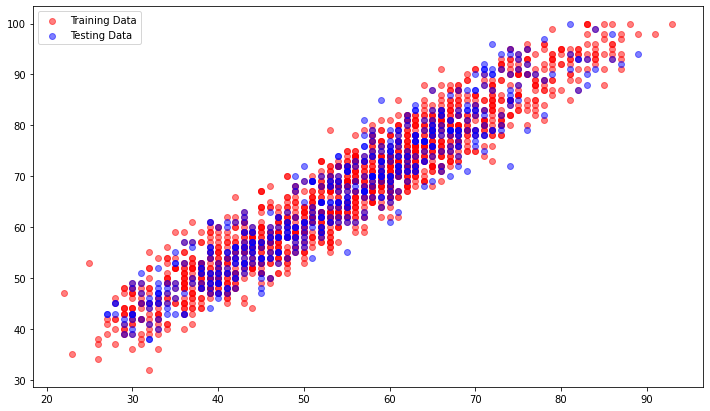

In [10]:
# this will visualize the training the model
plt.figure(figsize = (12, 7))
plt.scatter(X_train, y_train, label = 'Training Data', color = 'r', alpha = .5)
plt.scatter(X_test, y_test, label = 'Testing Data', color = 'b', alpha = .5)
plt.legend()
print('Projection Visualization 1')
plt.show()
# training data is everything used to make the line for the linear model

In [11]:
# scores the accuracy of the predictions and determines whether this is the appropiate model
print()
print('Score: ', regr.score(X_test, y_test))


Score:  0.9010217373817188


In [12]:
# comparing the projections versus the actual results; only looking at first ten
projectionComparison = []
for i in range(10):
    projectionComparison.append([math.floor(X_test[i][0]), math.floor(y_predict[i]), math.floor(y_test[i][0])])

projections = pd.DataFrame(projectionComparison, columns=['Test Score', 'Projected Score', 'Actual Score'])
print('Table with Actual Scores versus Projections')
projections

Table with Actual Scores versus Projections


,Test Score,Projected Score,Actual Score
0,71,82,91
1,67,78,75
2,58,70,70
3,39,51,50
4,57,69,67
5,58,70,79
6,70,81,83
7,58,70,74
8,44,56,55
9,52,64,59


In [19]:
print('Generate Projection')
input_text = widgets.Text(placeholder = 'Press enter after input...', description = 'Test Score:')
output_text = widgets.Text(description = 'Projection:')

def bind_input_to_output(sender):
    output_text.value = str(math.floor(regr.predict([[input_text.value]])))
    


Generate Projection


In [18]:
display(input_text)
display(output_text)

Text(value='88.0', description='Test Score:', placeholder='Press enter after input...')

Text(value='', description='Projection:')

C:\Users\swzha\Desktop\wgu-project\env\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\swzha\Desktop\wgu-project\env\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Unable to convert array of bytes/strings into decimal numbers with dtype='numeric'